In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Pastel1_7
import datetime
from datetime import datetime
import folium
%matplotlib inline

In [114]:
# Abro el dataset para explorar los datos
airbnb_bcn = pd.read_csv("./barcelona/listings1.csv", sep=',')

In [115]:
# estudio el contenido
airbnb_bcn.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,140,2,63,2020-02-22,0.49,3,173,0,HUTB-001722
1,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,316,5,167,2022-03-14,1.19,2,115,18,HUTB-001506
2,35318,Luxury room with private bathroom and balcony,152070,Michel,Ciutat Vella,el Barri Gòtic,41.38170,2.17730,Private room,93,3,245,2022-02-28,1.86,1,0,3,NaN
3,36763,In front of the beach,158596,Ester,Ciutat Vella,la Barceloneta,41.38043,2.19094,Private room,36,2,85,2021-11-02,0.67,1,191,12,NaN
4,40983,Classical loft close to pedrera!,177617,Joaquin,Eixample,la Dreta de l'Eixample,41.39631,2.16832,Entire home/apt,53,2,209,2022-03-05,1.60,6,241,38,HUTB-001282


In [117]:
# analizo el contenido
airbnb_bcn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16042 entries, 0 to 16041
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16042 non-null  int64  
 1   name                            16032 non-null  object 
 2   host_id                         16042 non-null  int64  
 3   host_name                       16038 non-null  object 
 4   neighbourhood_group             16042 non-null  object 
 5   neighbourhood                   16042 non-null  object 
 6   latitude                        16042 non-null  float64
 7   longitude                       16042 non-null  float64
 8   room_type                       16042 non-null  object 
 9   price                           16042 non-null  int64  
 10  minimum_nights                  16042 non-null  int64  
 11  number_of_reviews               16042 non-null  int64  
 12  last_review                     

# Leo la información que tengo en el dataset
+ id: identificador único de Airbnb para el anuncio
+ name: nombre como se anuncia el alojamiento
+ host_id: Identificador único de Airbnb para el anfitrión
+ host_name: Nombre del anfitrión, habitualmente solo el nombre.
+ neigbourhood_group: Distrito
+ neighbourhood: barrio
+ latitude: latitud del alojamiento
+ longitude: longitud del alojamiento
+ room_type: Tipo de alojamiento
+ price: precio por día
+ minimum_nights: Mínimo de noches por alojamiento
+ number_of_reviews: Número de reseñas
+ last_review: última reseña
+ reviews_per_month: reseñas por mes
+ calulated_host_listings_count: es todos los host_id que tiene un mismo host_name, El número de listados que el anfitrión tiene en el scrape actual
+ availability_365: La disponibilidad del anuncio x días en el futuro según el calendario. Tenga en cuenta que un anuncio puede no estar disponible porque ha sido reservado por un huésped o bloqueado por el anfitrión.
+ number_of_reviwes_ltm: Número de reseñas que tiene el anuncio en los últimos 12 meses.
+ license: el número de licencia.

In [194]:
#  elimino las columnas license y calculated_host_listings porque no las usaré en el análisis
airbnb_bcn = airbnb_bcn.drop(['license', 'calculated_host_listings_count'], axis=1) 

In [195]:
# visualizo con la columna eliminada
airbnb_bcn.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,number_of_reviews_ltm
0,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,140,2,63,2020-02-22,0.49,173,0
1,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,316,5,167,2022-03-14,1.19,115,18
2,35318,Luxury room with private bathroom and balcony,152070,Michel,Ciutat Vella,el Barri Gòtic,41.38170,2.17730,Private room,93,3,245,2022-02-28,1.86,0,3
3,36763,In front of the beach,158596,Ester,Ciutat Vella,la Barceloneta,41.38043,2.19094,Private room,36,2,85,2021-11-02,0.67,191,12
4,40983,Classical loft close to pedrera!,177617,Joaquin,Eixample,la Dreta de l'Eixample,41.39631,2.16832,Entire home/apt,53,2,209,2022-03-05,1.60,241,38


In [197]:
# quiero ver el tamaño que tiene
airbnb_bcn.shape

(16042, 16)

In [198]:
# quiero ver los datos, veo que el precio mínimo es 0, voy a comprobar también los nulos y haré la media en el precio mínimo
airbnb_bcn.describe(include='all')

/var/folders/wx/274cwf0567bfr403dd670hhr0000gn/T/ipykernel_10824/1550441270.py:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,number_of_reviews_ltm
count,1.604200e+04,16032,1.604200e+04,16038,16042,16042,16042.000000,16042.000000,16042,16042.000000,16042.000000,16042.000000,12079,12079.000000,16042.000000,16042.000000
unique,NaN,15590,NaN,3337,10,73,NaN,NaN,4,NaN,NaN,NaN,1635,NaN,NaN,NaN
top,NaN,Apartment next to Sagrada Familila with A/C an...,NaN,Eva&Jack,Eixample,la Dreta de l'Eixample,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2022-03-06 00:00:00,NaN,NaN,NaN
freq,NaN,9,NaN,169,5555,1933,NaN,NaN,8799,NaN,NaN,NaN,379,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-06-23 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-30 00:00:00,NaN,NaN,NaN
mean,1.430896e+16,NaN,1.249522e+08,NaN,NaN,NaN,41.392016,2.166318,NaN,117.992894,13.459232,37.447762,NaN,1.098449,169.002556,6.912667
std,8.826530e+16,NaN,1.309618e+08,NaN,NaN,NaN,0.014835,0.019176,NaN,326.874198,34.932123,71.662377,NaN,1.540837,126.437221,15.622652
min,1.867400e+04,NaN,3.073000e+03,NaN,NaN,NaN,41.352608,2.055280,NaN,8.000000,1.000000,0.000000,NaN,0.010000,0.000000,0.000000
25%,1.617274e+07,NaN,9.478280e+06,NaN,NaN,NaN,41.380490,2.156170,NaN,41.000000,1.000000,1.000000,NaN,0.170000,31.000000,0.000000


In [199]:
# voy a ver bien los nulos
airbnb_bcn.isnull().sum()

id                          0
name                       10
host_id                     0
host_name                   4
neighbourhood_group         0
neighbourhood               0
latitude                    0
longitude                   0
room_type                   0
price                       0
minimum_nights              0
number_of_reviews           0
last_review              3963
reviews_per_month        3963
availability_365            0
number_of_reviews_ltm       0
dtype: int64

In [200]:
# reemplazo los valores nulos de los precios por la media de los precios de la columna
airbnb_bcn['price'] = airbnb_bcn['price'].replace(0,np.median(airbnb_bcn['price']))

In [201]:
# quería rellenar también las últimas reseñas pero, lo dejaré así para que sea lo más real
#airbnb_bcn['last_review'].fillna(method='ffill', inplace=True) 

In [202]:
# quiero ver las reseñas para saber desde cuando son los datos, le aplico datetime para que lo pueda leer bien
airbnb_bcn['last_review'] = airbnb_bcn['last_review'].apply(pd.to_datetime) 

In [220]:
# las primeras reseñas empiezan en 2011, así que sé que desde está fecha hay datos
reseñas = airbnb_bcn[airbnb_bcn['last_review'].dt.year == 2011] 
reseñas.groupby('neighbourhood_group').sum().reset_index()

,neighbourhood_group,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm
0,Gràcia,71520,366428,41.41841,2.13307,250,5,1,0.01,343,0


Barrios

In [204]:
# quiero empezar analizano los barrios

73


(-0.5, 511.5, 383.5, -0.5)

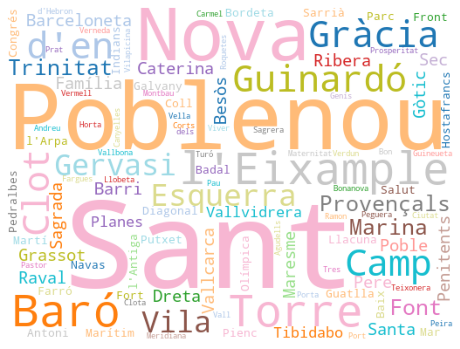

In [205]:
# NOMBRE DE TODOS LOS BARRIOS, está grafica finalmente no la uso en el EDA
print(airbnb_bcn.neighbourhood.nunique()) 
nombre_barrios= airbnb_bcn.neighbourhood.unique()
STOPWORDS.add('la') 
STOPWORDS.add('de')
STOPWORDS.add('del')
STOPWORDS.add('el')
STOPWORDS.add('les')
STOPWORDS.add('els')

Mis_stopwords = STOPWORDS
plt.subplots(figsize=(8,8))  
wordcloud = WordCloud(
                          background_color='white',    
                          width=512,                 
                          height=384, stopwords= Mis_stopwords,  colormap='tab20',
                         ).generate("  ".join(nombre_barrios))   
plt.imshow(wordcloud)
plt.axis('off')      
#plt.savefig('./img/nombre_barrios.png') guardo la imagen

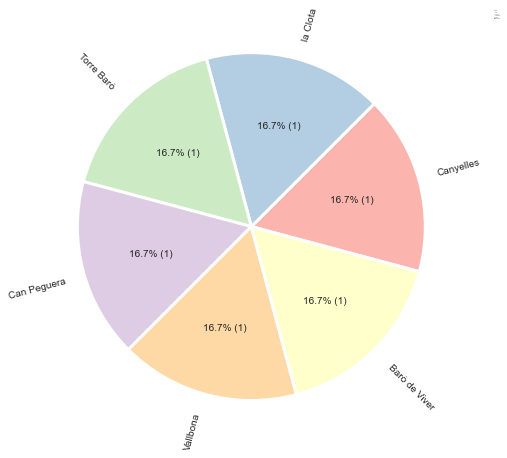

In [206]:
# quiero saber cuales son los barrios menos concurrentes en Airbnb
barrio_menos_recurrente = airbnb_bcn['neighbourhood'].value_counts()
mask = barrio_menos_recurrente == barrio_menos_recurrente.min()
def autopct_fun(abs_values): 
    val = iter(abs_values)
    return lambda pct: f"{pct:.1f}% ({next(val)})"
counts = barrio_menos_recurrente[mask]

# VISUALIZACIÓN BARRIOS MENOS RECURRENTES
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(8,8))
plt.pie(barrio_menos_recurrente[mask],     
        labels=barrio_menos_recurrente[mask].index, startangle= -15,
        autopct=autopct_fun(counts), rotatelabels= 95, colors=Pastel1_7.hex_colors, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.savefig('barrio_menos_concurrente_min.png') 

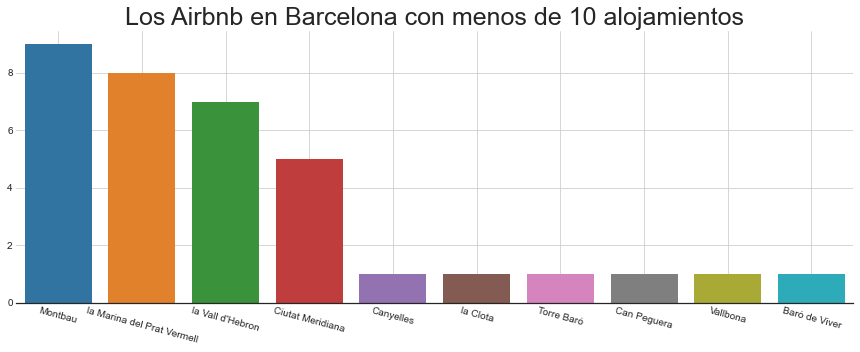

In [207]:
# ANALIZO EL BARRIO MENOS CONCURRIDO APLICANDO UNA MASCARA CON LOS BARRIOS QUE TIENEN MENOS DE 10 ALOJAMIENTOS POR BARRIO
barrio_menos_recurrente = airbnb_bcn['neighbourhood'].value_counts()
barrio_menos_recurrente = barrio_menos_recurrente[barrio_menos_recurrente < 10]
df =pd.DataFrame(barrio_menos_recurrente).reset_index()

# hay en total 10 barrios que cuentan con menos de 10 airbnb
plt.figure(figsize=(15, 5))
sns.barplot(x = df['index'], y = df['neighbourhood'], data = df)
plt.xticks(rotation = -15)
sns.despine(left = True)
plt.title('Los Airbnb en Barcelona con menos de 10 alojamientos', size=25)
plt.xlabel('')
plt.ylabel('')
plt.grid();
#plt.savefig('./img/barrio_menos_concurrente_10.png')


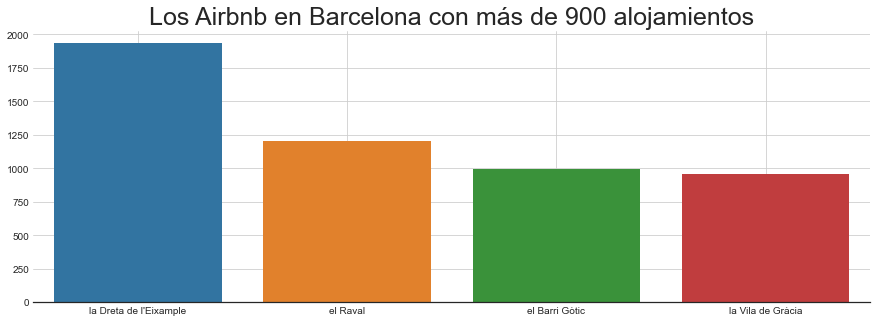

In [208]:
# quiero ver los Airbnb que tienen más de 900 alojamientos
barrio_mas_recurrente = airbnb_bcn['neighbourhood'].value_counts()
barrio_mas_recurrente = barrio_mas_recurrente[barrio_mas_recurrente > 943]
#print(barrio_mas_recurrente)
df =barrio_mas_recurrente.reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(x = df['index'], y = df['neighbourhood'], data = df)
plt.xticks()
sns.despine(left = True)
plt.title('Los Airbnb en Barcelona con más de 900 alojamientos', size=25)
plt.xlabel('')
plt.ylabel('')
plt.grid();
#plt.savefig('./img/barrio_mas_concurrente_barcelona.png')

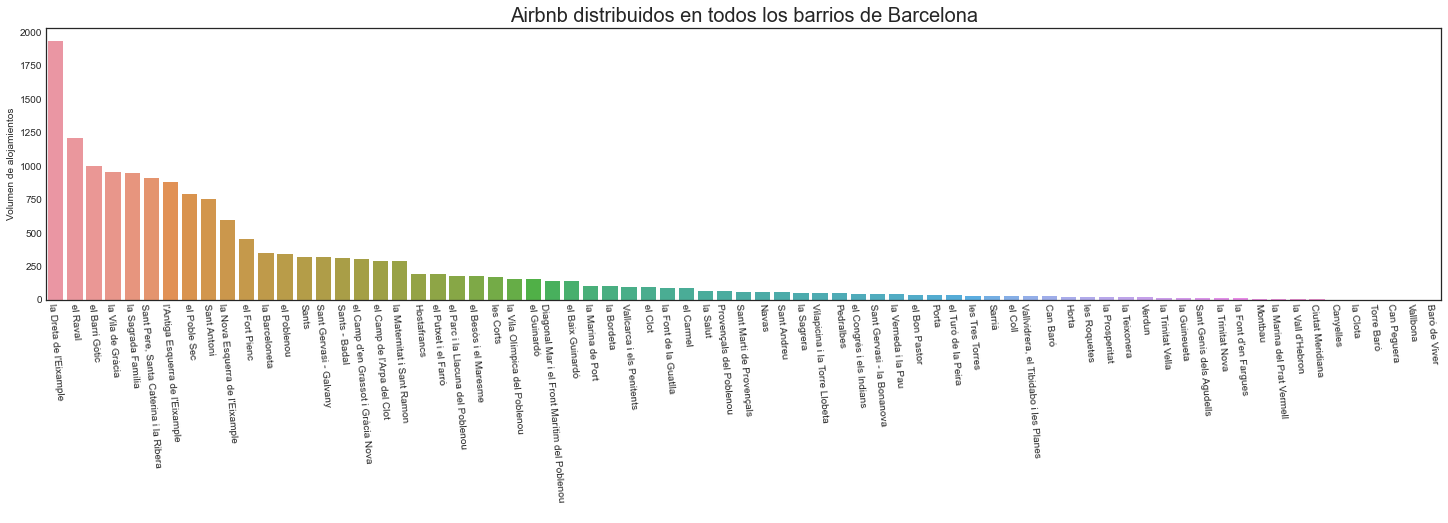

In [209]:
# quiero ver como están distribuidos todos los Airbnb por barrio 
plt.figure(figsize=(25, 5))
sns.countplot(x = 'neighbourhood', data=airbnb_bcn, order = airbnb_bcn['neighbourhood'].value_counts().index)
plt.title("Airbnb distribuidos en todos los barrios de Barcelona", fontsize= 20)
plt.xlabel(" ")
plt.ylabel("Volumen de alojamientos")
plt.xticks(rotation = -85);
#plt.savefig('./img/barrio_distribucion.png') 

Voy a empezar a analizar los distritos

10


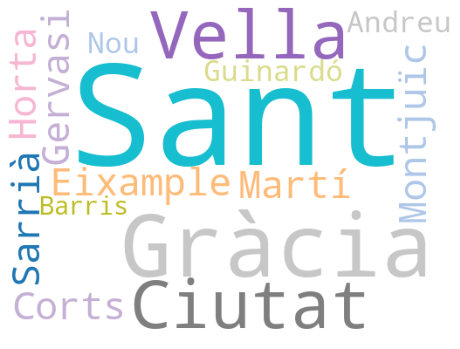

In [210]:
# NOMBRE DE TODOS LOS distritos, finalmente no lo uso
print(airbnb_bcn.neighbourhood_group.nunique()) 
nombre_distritos= airbnb_bcn.neighbourhood_group.unique() 

# VISUALIZACIÓN NOMBRES DISTRITOS
plt.subplots(figsize=(8,8))      
wordcloud = WordCloud(
                          background_color='white',   
                          width=512,            
                          height=384,  colormap='tab20',
                         ).generate("  ".join(nombre_distritos))
plt.imshow(wordcloud)
plt.axis('off'); 
#plt.savefig('./img/nombre_distritos.png')

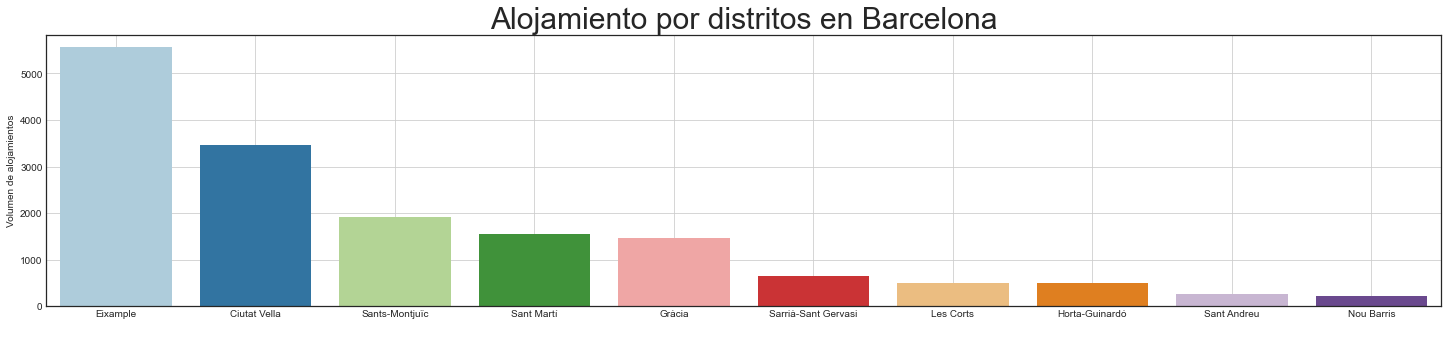

In [211]:
# quiero ver como están distribuidos los Airbnb en los distritos
plt.figure(figsize=(25, 5))
sns.countplot(x = 'neighbourhood_group', data=airbnb_bcn, palette='Paired', order = airbnb_bcn['neighbourhood_group'].value_counts().index)
plt.title("Alojamiento por distritos en Barcelona", fontsize= 30)
plt.xlabel(" ")
plt.rc('legend', fontsize=1)
plt.ylabel("Volumen de alojamientos")
plt.grid();
#plt.savefig('./img/alojamiento_por_distritos_10.png') 


In [212]:
# visualizo
airbnb_bcn['neighbourhood_group'].value_counts()

Eixample               5555
Ciutat Vella           3457
Sants-Montjuïc         1915
Sant Martí             1543
Gràcia                 1455
Sarrià-Sant Gervasi     641
Les Corts               508
Horta-Guinardó          492
Sant Andreu             262
Nou Barris              214
Name: neighbourhood_group, dtype: int64

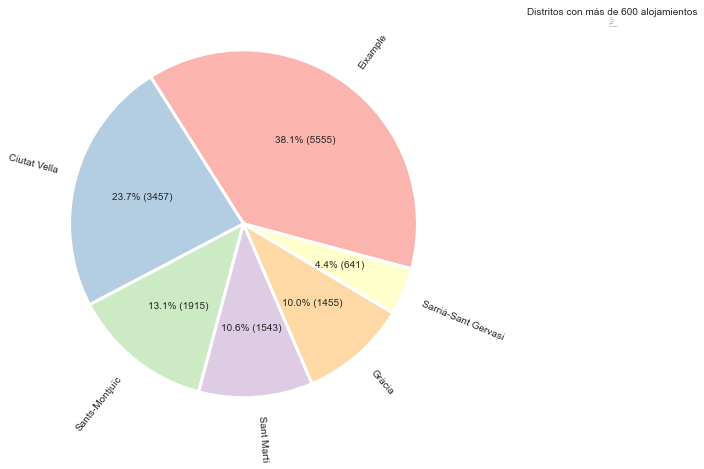

In [213]:
# quiero ver los distritos que tienen más de 600 alojamientos, finalmente no uso esta gráfica
df = airbnb_bcn['neighbourhood_group'].value_counts()
#print(df)
distrito_mas_600_ = df[df> 600]

def autopct_fun(abs_values): 
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}% ({next(gen)})"
counts = distrito_mas_600_

plt.figure(figsize=(8,8))
plt.pie(distrito_mas_600_,  
        labels=distrito_mas_600_.index, startangle= -15,
        autopct=autopct_fun(counts), rotatelabels= 95, colors=Pastel1_7.hex_colors, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.legend(title= "Distritos con más de 600 alojamientos",bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0.)
#plt.savefig('distrito_mas_600_alojamientos.png') 

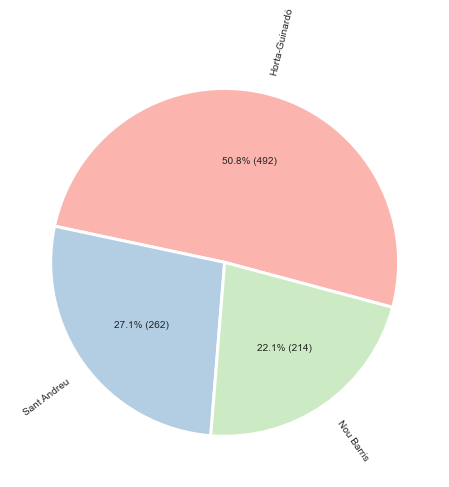

In [214]:
# quiero ver los distritos que tienen menos de 500 alojamientos, finalmento no uso esta gráfica
distrito_menos_recurrente = airbnb_bcn['neighbourhood_group'].value_counts()
#print(distrito_menos_recurrente)
distrito_menos_recurrente= distrito_menos_recurrente[distrito_menos_recurrente < 500]
counts = distrito_menos_recurrente 

plt.figure(figsize=(8,8))
plt.pie(distrito_menos_recurrente,  
        labels=distrito_menos_recurrente.index, startangle= -15,
        autopct=autopct_fun(counts), rotatelabels= 95, colors=Pastel1_7.hex_colors, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });

In [215]:
# quiero empezar a analizar los precios

   neighbourhood_group  price
6          Sant Andreu     13
4            Les Corts     11
7           Sant Martí     10
1             Eixample      9
3       Horta-Guinardó      9
5           Nou Barris      9
8       Sants-Montjuïc      9
9  Sarrià-Sant Gervasi      9
0         Ciutat Vella      8
2               Gràcia      8


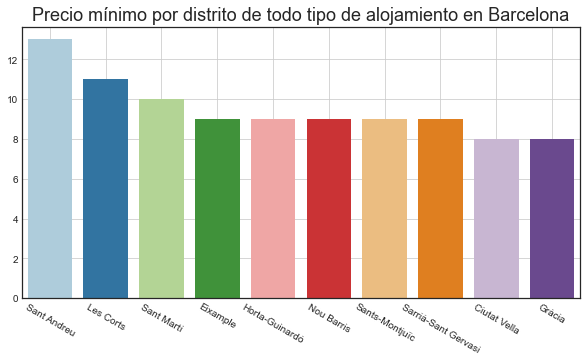

In [216]:
# quiero ver el precio mínimo por distrito, independiente del tipo de alojamiento
d = airbnb_bcn.groupby('neighbourhood_group')[['price']].min().reset_index().sort_values(by=['price'], ascending=False)   # importante el tema del reset index xk si no, no me deja
print(d)
plt.figure(figsize=(10, 5))
sns.barplot(x="neighbourhood_group", y="price", data=d, palette='Paired')
plt.grid()
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = -30);
plt.title('Precio mínimo por distrito de todo tipo de alojamiento en Barcelona', fontsize= 18);
#plt.savefig('./img/precio_min_distrito.png') 

   neighbourhood_group  price
1             Eixample   9200
4            Les Corts   9100
8       Sants-Montjuïc   9100
9  Sarrià-Sant Gervasi   9026
7           Sant Martí   9000
0         Ciutat Vella   5722
2               Gràcia   5000
5           Nou Barris   3334
6          Sant Andreu   2000
3       Horta-Guinardó   1362


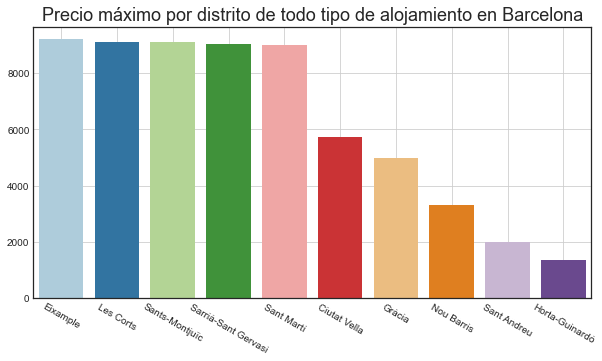

In [217]:
# quiero ver el precio máximo que puede haber por distrito
d = airbnb_bcn.groupby('neighbourhood_group')[['price']].max().reset_index().sort_values(by=['price'], ascending=False) 
print(d)

plt.figure(figsize=(10, 5))
sns.barplot(x="neighbourhood_group", y="price", data=d, palette='Paired')
plt.xlabel('')
plt.ylabel('')
plt.grid()
plt.xticks(rotation = -30);
plt.title('Precio máximo por distrito de todo tipo de alojamiento en Barcelona', fontsize= 18);
#plt.savefig('./img/precio_max_distrito_todos_aloj.png') 

   neighbourhood_group       price
4            Les Corts  155.263780
1             Eixample  142.062826
9  Sarrià-Sant Gervasi  124.421217
7           Sant Martí  118.024627
8       Sants-Montjuïc  114.140992
2               Gràcia  103.123711
0         Ciutat Vella   94.983512
6          Sant Andreu   68.816794
5           Nou Barris   67.901869
3       Horta-Guinardó   67.884146


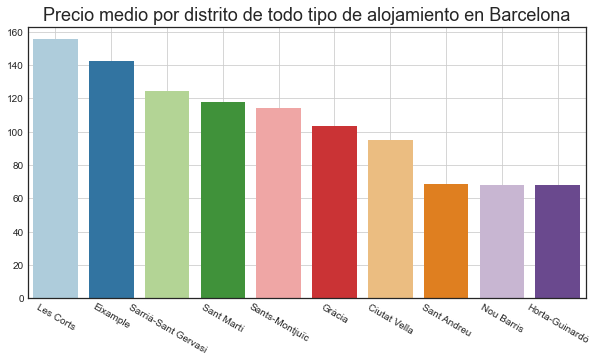

In [218]:
# quiero ver la media de los precios por distrito
d = airbnb_bcn.groupby('neighbourhood_group')[['price']].mean().reset_index().sort_values(by=['price'], ascending=False) 
print(d)
plt.figure(figsize=(10, 5))
sns.barplot(x="neighbourhood_group", y="price", data=d, palette='Paired')
plt.grid()
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = -30);
plt.title('Precio medio por distrito de todo tipo de alojamiento en Barcelona', fontsize= 18);
#plt.savefig('./img/precio_media_distrito.png') 

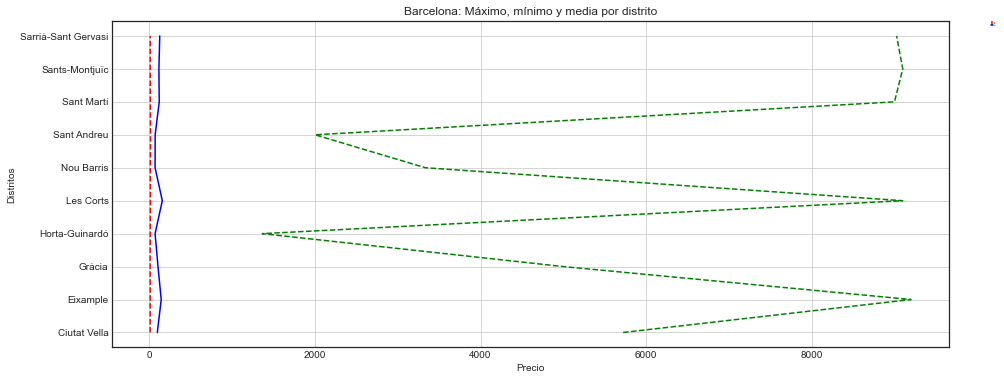

In [ ]:
# VISUALIZACION PRECIO MINIMO, MAX Y MEDIO POR DISTRITO, finalmente no uso esta gráfica
precio_distrito_min = airbnb_bcn.groupby('neighbourhood_group')['price'].min()
precio_max_distrito = airbnb_bcn.groupby('neighbourhood_group')['price'].max()

plt.style.use("seaborn-white")
plt.figure(figsize=(15,6)) 
plt.plot(precio_distrito_min, precio_distrito_min.index, linestyle = "--", color="r", label = "min")
plt.plot(precio_max_distrito, precio_max_distrito.index, linestyle = "--", color="g", label = "max")
plt.plot(precio_mean_distrito, precio_mean_distrito.index, linestyle = "-", color="b", label = "media")
plt.title("Barcelona: Máximo, mínimo y media por distrito")
plt.xlabel("Precio")
plt.ylabel("Distritos")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

In [ ]:
# ahora quiero analizar los diferentes tipos de alojamiento

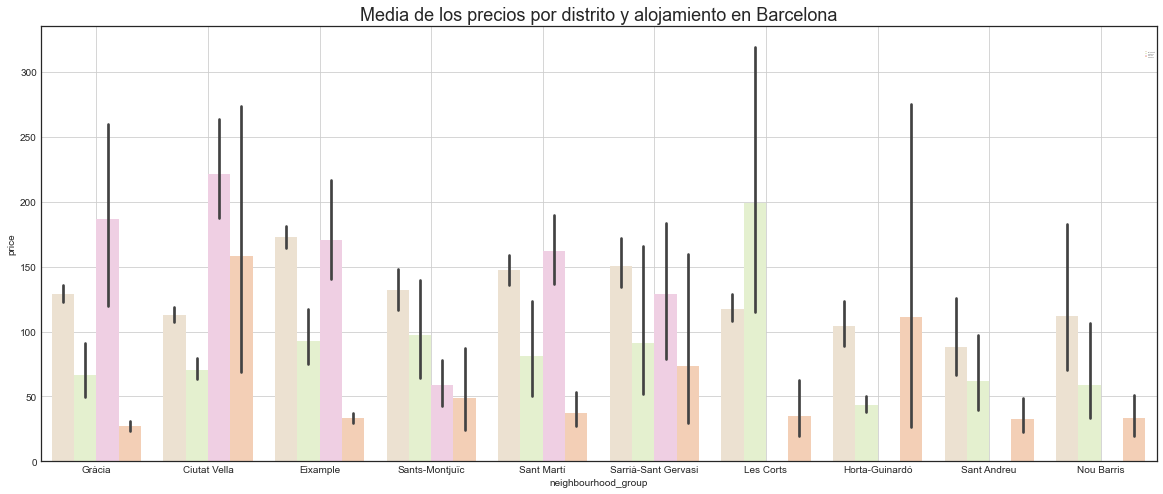

In [ ]:
# visualizo agrupo por los distintos apartamentos y diferentes alojamientos la media de los precios, no la he usado en la presentación
plt.figure(figsize=(20, 8))
sns.barplot(x="neighbourhood_group", y="price", hue= 'room_type', data=airbnb_bcn, palette='Pastel2_r') 
plt.grid()
plt.legend(bbox_to_anchor=(1., .95), loc='upper right', borderaxespad=2.)
plt.title('Media de los precios por distrito y alojamiento en Barcelona', fontsize= 18);
#plt.savefig('./img/media_precio_distrito_alojamiento.png')


In [ ]:
# agrupo por tipo de habitación, tipo de distrito y usaré de referencia el host_id porque lo que devuelve es númerico no como el host name, pruebas
apartamento_por_distrito = pd.DataFrame(airbnb_bcn[['host_id','room_type','neighbourhood_group']].groupby(['neighbourhood_group','room_type']).host_id.count().reset_index())
apartamento_por_distrito

,neighbourhood_group,room_type,host_id
0,Ciutat Vella,Entire home/apt,1817
1,Ciutat Vella,Hotel room,34
2,Ciutat Vella,Private room,1573
3,Ciutat Vella,Shared room,33
4,Eixample,Entire home/apt,3376
5,Eixample,Hotel room,115
6,Eixample,Private room,1977
7,Eixample,Shared room,87
8,Gràcia,Entire home/apt,816
9,Gràcia,Hotel room,24


Text(0, 0.5, '')

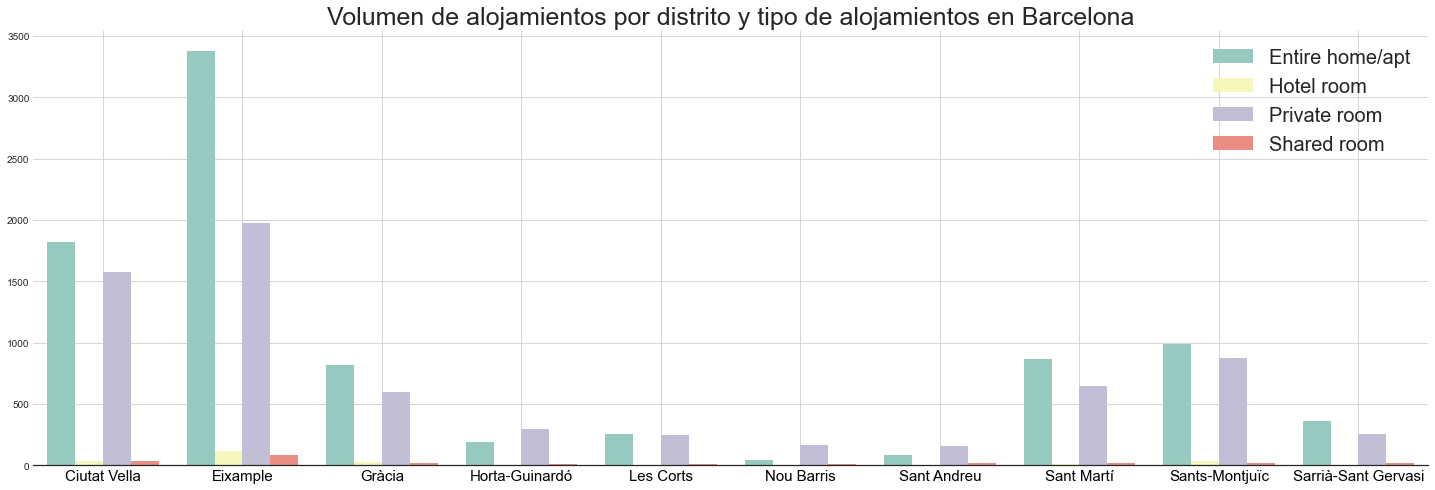

In [ ]:
# quiero ver por distrito que tipo de apartamento hay más
apartamento_por_distrito = pd.DataFrame(airbnb_bcn[['host_id','room_type','neighbourhood_group']].groupby(['neighbourhood_group','room_type']).host_id.count().reset_index())
apartamento_por_distrito
plt.figure(figsize=(25, 8))
sns.barplot( x="neighbourhood_group", y="host_id", data=apartamento_por_distrito, hue ='room_type', palette='Set3')
plt.grid()
plt.title('Volumen de alojamientos por distrito y tipo de alojamientos en Barcelona', size=25)
plt.legend(loc="upper right",  fontsize= 20)
sns.despine(left = True)
plt.xticks(size=15, color= 'k')
plt.xlabel('')
plt.ylabel('')
#plt.savefig('./img/volumen_alojamiento_distrito_bcn.png') # se guarda la imagen

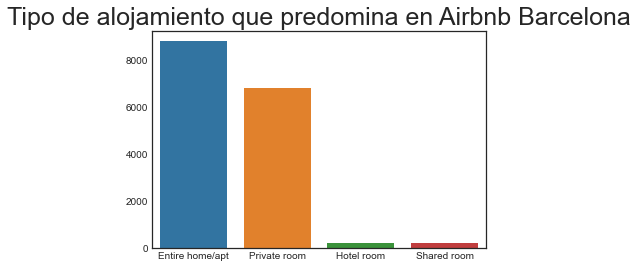

In [ ]:
# visualizo qué tipo de alojamiento hay más
sns.countplot(x = 'room_type', data=airbnb_bcn)
plt.xlabel('')
plt.ylabel('')
plt.title('Tipo de alojamiento que predomina en Airbnb Barcelona', size=25);
#plt.savefig('./img/volumen_alojamiento_distrito_bcnn.png') 

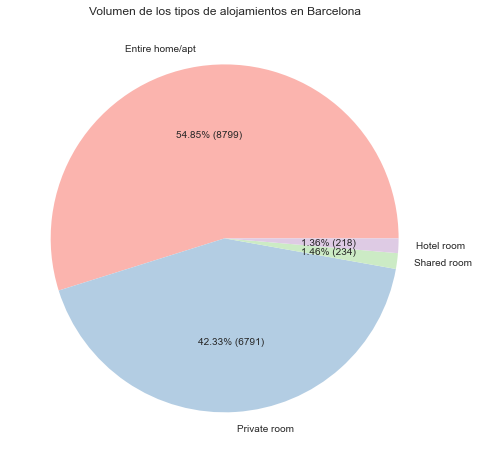

In [ ]:
# Otro tipo de visulización qué tipo de alojamientos hay más
tipo_apartamento = airbnb_bcn['room_type'].value_counts()

def autopct_fun(abs_values): 
    val = iter(abs_values)
    name = iter(tipo_apartamento)
    return lambda pct: f"{pct:.2f}% ({next(val, name)})"

counts = tipo_apartamento
my_circle=plt.Circle( (0,0), 0.5, color='white')  
plt.figure(figsize=(8,8))
plt.pie(tipo_apartamento.values,  labels=tipo_apartamento.index,  
        autopct=autopct_fun(counts), colors=Pastel1_7.hex_colors) 
plt.title("Volumen de los tipos de alojamientos en Barcelona");
#plt.savefig('max_alojamiento_distrito.png') 

In [ ]:
# observo las descripciones general de los precios
airbnb_bcn.price.describe()

count    16042.000000
mean       117.992894
std        326.874198
min          8.000000
25%         41.000000
50%         75.000000
75%        129.000000
max       9200.000000
Name: price, dtype: float64

Text(0, 0.5, 'Numero de apartamentos')

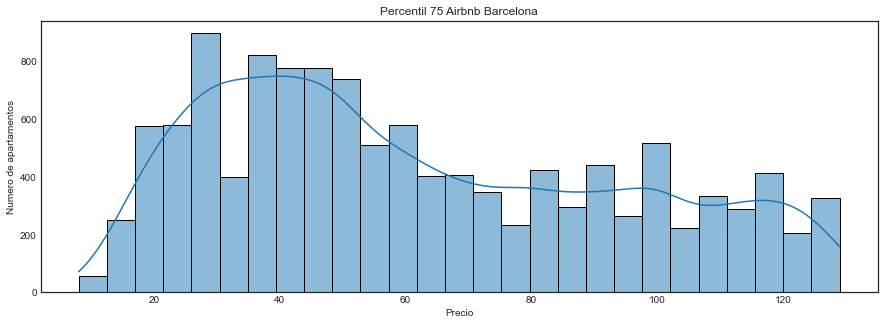

In [ ]:
# Visualizo como está distribuido el percentil 75
inferior_150 = airbnb_bcn[airbnb_bcn['price']<=129] 

plt.figure(figsize=(15,5))
sns.histplot(x='price', data=inferior_150, kde=True, palette='Pastel2_r')
plt.title('Percentil 75 Airbnb Barcelona')
plt.xlabel("Precio")
plt.ylabel("Numero de apartamentos")
#plt.savefig('./img/alojamientos_precio_percentil_bcn.png') # se guarda la imagen

         room_type       price
1       Hotel room  163.091743
0  Entire home/apt  144.074781
2     Private room   84.820645
3      Shared room   57.935897


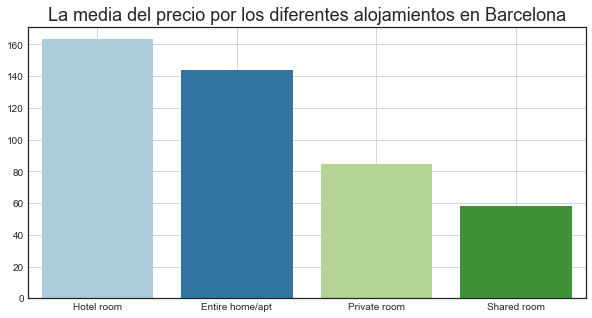

In [ ]:
# quiero ver el precio media por los diferentes tipos de alojamientos
d = airbnb_bcn.groupby('room_type')[['price']].mean().reset_index().sort_values(by=['price'], ascending=False) 
print(d)

plt.figure(figsize=(10, 5))
sns.barplot(x="room_type", y="price", data=d, palette='Paired')
plt.title('La media del precio por los diferentes alojamientos en Barcelona', fontsize= 18)
plt.grid()
plt.xlabel('')
plt.ylabel('');
#plt.savefig('./img/precio_medio_por_alojamiento_bcn.png')


In [ ]:
# porcentaje que ocupan los alojamientos de más de 1000, o sea haciendo el cálculo, hay super pocos apartamentos que superen los 1000€
columnas = len(airbnb_bcn.index)
print(columnas)
porcentaje = 76 *100/16042 # este es el peso que ocupa los alojamientos de más de mil euros
print(porcentaje, "%")

16042
0.4737563894776212 %


         room_type  price
2     Private room   9200
0  Entire home/apt   6666
1       Hotel room   2000
3      Shared room    999


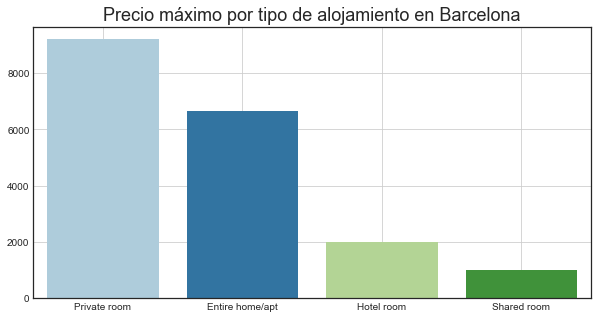

In [ ]:
# quiero ver el precio máximo por alojamiento
d = airbnb_bcn.groupby('room_type')[['price']].max().reset_index().sort_values(by=['price'], ascending=False) 
print(d)
plt.figure(figsize=(10, 5))
sns.barplot(x="room_type", y="price", data=d, palette='Paired')
plt.title('Precio máximo por tipo de alojamiento en Barcelona', fontsize= 18)
plt.grid()
plt.xlabel('')
plt.ylabel('');
#plt.savefig('./img/precio_max_por_alojamiento_bcn.png')

         room_type  price
0  Entire home/apt      8
2     Private room      8
3      Shared room     10
1       Hotel room     17


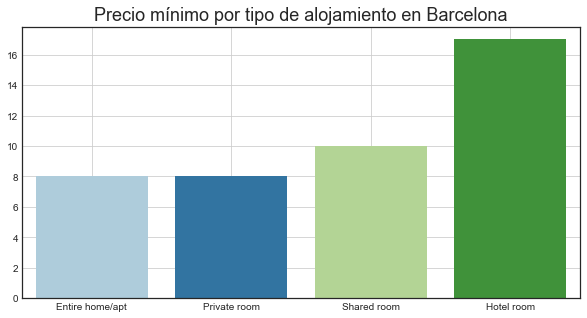

In [ ]:
# quiero ver el precio mínimo por alojamiento
d = airbnb_bcn.groupby('room_type')[['price']].min().reset_index().sort_values(by=['price'])
print(d)

plt.figure(figsize=(10, 5))
sns.barplot(x="room_type", y="price", data=d, palette='Paired')
plt.title('Precio mínimo por tipo de alojamiento en Barcelona', fontsize= 18)
plt.grid()
plt.xlabel('')
plt.ylabel('');
#plt.savefig('./img/precio_min_por_alojamiento_bcn.png') 

/Users/lauragarciasanchez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



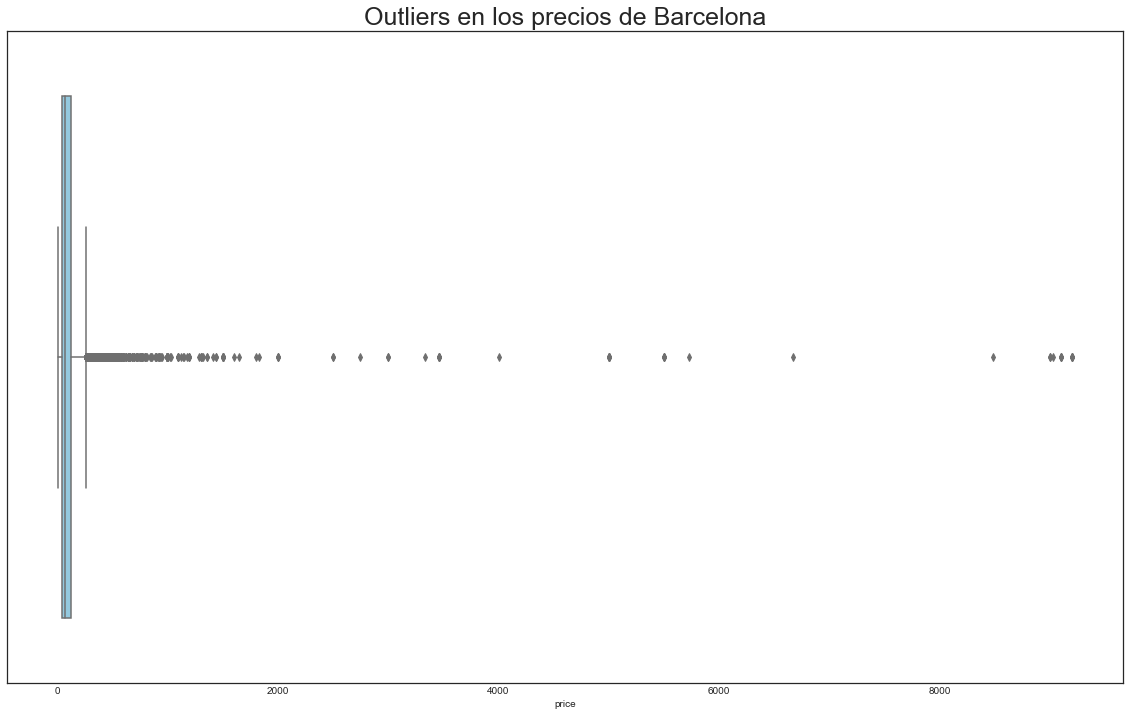

In [ ]:
# quiero ver los outliers de los precios
plt.figure(figsize=(20,12))
sns.boxplot(airbnb_bcn['price'], color= 'skyblue') 
plt.title('Outliers en los precios de Barcelona', fontsize= 25);
#plt.savefig('./img/precio_boxplot_bcn.png')

In [ ]:
# analizo los host_id y host_name, pero no lo usaré, solo para ver si veo algo que me llame la atención
airbnb_bcn.host_id.value_counts()

4459553      169
226804666    152
158023606    131
1447144      122
299462       114
            ... 
37986811       1
20802329       1
13534703       1
51389505       1
447071909      1
Name: host_id, Length: 7162, dtype: int64

In [ ]:
airbnb_bcn.host_name.value_counts()

Eva&Jack              169
Luis                  158
Miroslav              152
Jordi                 135
Habitat Apartments    131
                     ... 
Frid                    1
Mollie                  1
Hazael                  1
Megi                    1
Angela María            1
Name: host_name, Length: 3337, dtype: int64

In [ ]:
airbnb_bcn[airbnb_bcn['host_name']=='Eva&Jack' ].head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
1317,3232397,Cosy Apartment with 75m2 Private Terrace near ...,4459553,Eva&Jack,Eixample,l'Antiga Esquerra de l'Eixample,41.39446,2.15518,Entire home/apt,165,2,52,2022-02-06,1.02,169,336,13,HUTB-007998
3648,14751508,Modern 3-Bedroom Apartment in Poblenou near Av...,4459553,Eva&Jack,Sant Martí,el Poblenou,41.40638,2.20272,Entire home/apt,88,2,34,2022-02-13,0.51,169,342,6,HUTB-012080
3763,15049853,Delightful Apartment near Las Ramblas - Ref. G...,4459553,Eva&Jack,Sants-Montjuïc,el Poble Sec,41.37369,2.16739,Entire home/apt,82,2,50,2021-12-21,0.76,169,294,11,HUTB-008457


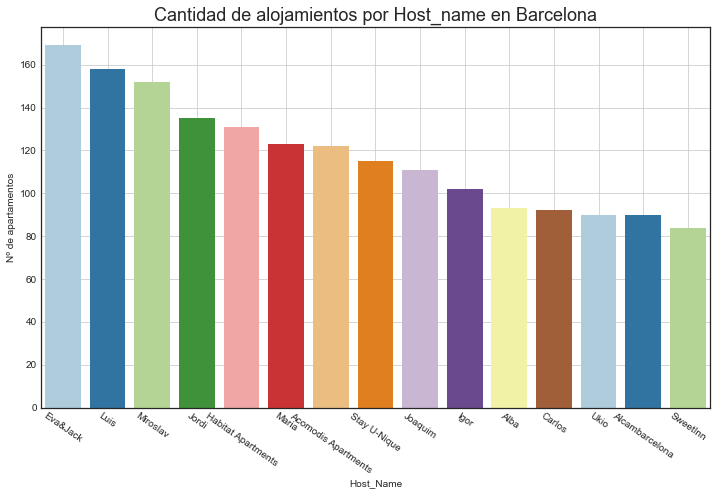

In [ ]:
# Visualizo en con el host_name cuantos apartamentos tiene cada uno de ellos
host_name_apartamentos = pd.DataFrame({'Host_Name':airbnb_bcn['host_name'].value_counts(ascending=False).index,
                                         'Nº de apartamentos': airbnb_bcn['host_name'].value_counts(ascending=False).values})[:15]


plt.figure(figsize=(12,7))
sns.barplot(x='Host_Name', y='Nº de apartamentos', data = host_name_apartamentos, palette='Paired')
plt.title('Cantidad de alojamientos por Host_name en Barcelona', fontsize= 18)
plt.xticks(rotation = -35)
plt.grid()
#plt.savefig('./img/alojamientos_host_name_bcn.png') 

      Host_id  Nº de apartamentos
0     4459553                 169
1   226804666                 152
2   158023606                 131
3     1447144                 122
4      299462                 114
5   265193861                 107
6    36607755                  98
7      396363                  90
8   346367515                  90
9    32037490                  84
10    1391607                  83
11    1310304                  70
12   47171261                  66
13  193874212                  58
14  130223809                  52


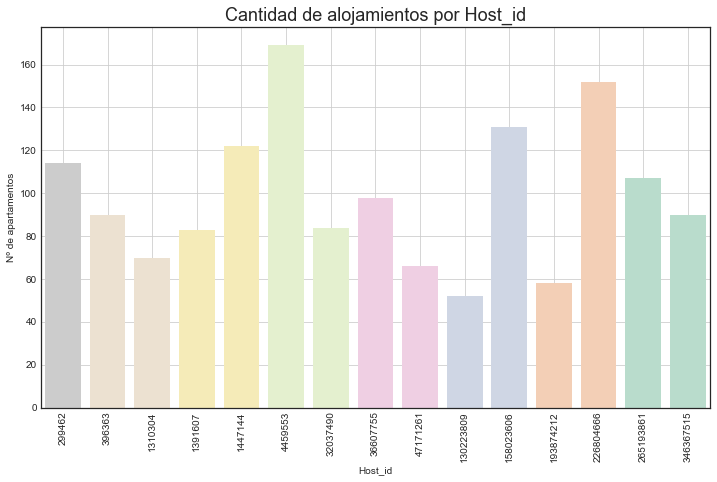

In [ ]:
# Visualizo en con el host_if cuantos apartamentos tiene cada uno de ellos
host_id_apartamentos = pd.DataFrame({'Host_id':airbnb_bcn['host_id'].value_counts(ascending=False).index,
                               'Nº de apartamentos': airbnb_bcn['host_id'].value_counts(ascending=False).values})[:15]
print(host_id_apartamentos)

plt.figure(figsize=(12,7))
sns.barplot(x='Host_id', y='Nº de apartamentos', data = host_id_apartamentos, palette='Pastel2_r')
plt.title('Cantidad de alojamientos por Host_id', fontsize= 18)
plt.xticks(rotation = 90)
plt.grid()
# plt.savefig('alojamientos_host_id.png') 

   neighbourhood_group  availability_365
9  Sarrià-Sant Gervasi        190.179407
2               Gràcia        180.087973
6          Sant Andreu        179.633588
1             Eixample        176.694869
4            Les Corts        175.592520
8       Sants-Montjuïc        161.324804
7           Sant Martí        159.128321
0         Ciutat Vella        157.817761
3       Horta-Guinardó        155.420732
5           Nou Barris        153.672897


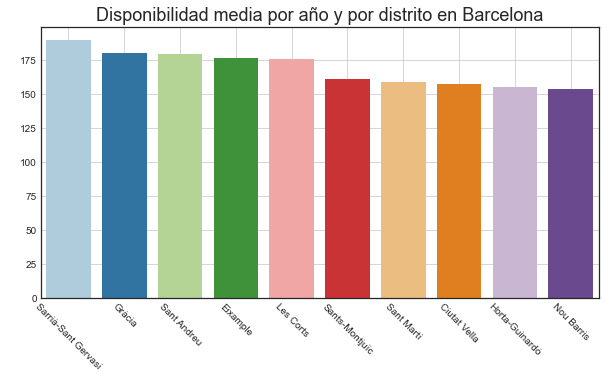

In [ ]:
# quiero ver la disponibilidad media por distrito
d = airbnb_bcn.groupby('neighbourhood_group')[['availability_365']].mean().reset_index().sort_values(by=['availability_365'], ascending=False) 
print(d)
plt.figure(figsize=(10, 5))
sns.barplot( x="neighbourhood_group",y="availability_365", data=d, palette='Paired' )
plt.grid()
plt.ylabel(" ")
plt.xlabel(" ")
plt.xticks(rotation = -45);
plt.title('Disponibilidad media por año y por distrito en Barcelona', fontsize= 18);

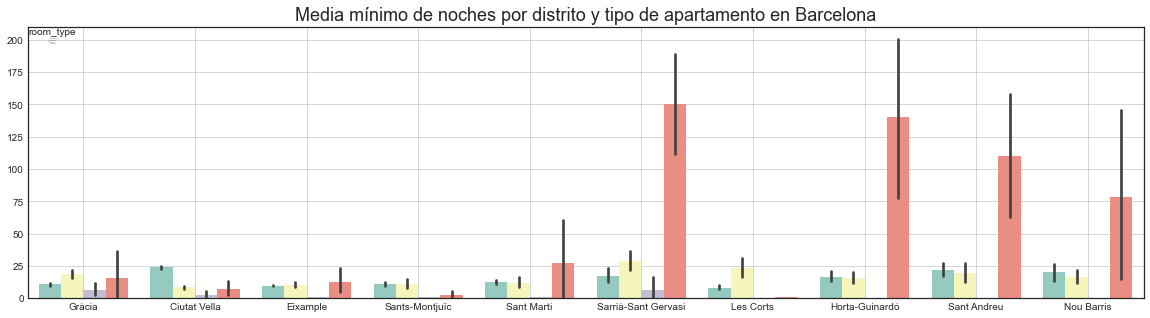

In [ ]:
# quiero saber por tipo de apartamento y en que distrito, lo minimo que piden por noche
plt.figure(figsize=(20, 5))
sns.barplot( x="neighbourhood_group",y="minimum_nights", hue = 'room_type',data=airbnb_bcn, palette='Set3')
plt.grid()
plt.xlabel('')
plt.ylabel('');
plt.title('Media mínimo de noches por distrito y tipo de apartamento en Barcelona', fontsize= 18);
#plt.savefig('./img/meannoches_distrito_room_type_bcn.png')

In [ ]:
airbnb_bcn.minimum_nights.describe()

count    16042.000000
mean        13.459232
std         34.932123
min          1.000000
25%          1.000000
50%          3.000000
75%         30.000000
max       1124.000000
Name: minimum_nights, dtype: float64

In [ ]:
# quiero analizar las reseñas
tabla = pd.pivot_table(airbnb_bcn, index= 'neighbourhood_group', columns='room_type', values='number_of_reviews')
tabla

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Ciutat Vella,22.097964,41.676471,35.897012,24.363636
Eixample,54.545616,36.200000,25.712696,27.126437
Gràcia,57.115196,7.916667,19.836975,67.100000
Horta-Guinardó,40.319149,NaN,25.505085,0.222222
Les Corts,54.801556,NaN,14.905350,47.000000
Nou Barris,17.425000,NaN,19.520958,2.428571
Sant Andreu,26.627907,NaN,17.360248,0.666667
Sant Martí,45.860438,11.750000,26.910632,2.789474
Sants-Montjuïc,61.297270,24.193548,26.368721,4.105263


In [ ]:
airbnb_bcn.number_of_reviews.describe()

count    16042.000000
mean        37.447762
std         71.662377
min          0.000000
25%          1.000000
50%          6.000000
75%         40.000000
max        960.000000
Name: number_of_reviews, dtype: float64

   neighbourhood_group  number_of_reviews
1             Eixample             241503
0         Ciutat Vella              98839
8       Sants-Montjuïc              84550
2               Gràcia              59941
7           Sant Martí              57373
4            Les Corts              18082
9  Sarrià-Sant Gervasi              16274
3       Horta-Guinardó              15106
6          Sant Andreu               5095
5           Nou Barris               3974
600737


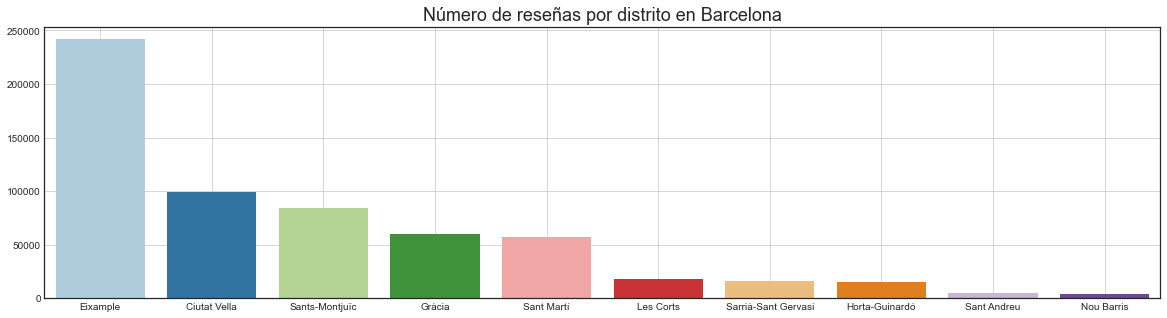

In [ ]:
# visualizo por separado el numero de reseñas por distrito
d = airbnb_bcn.groupby('neighbourhood_group', )[['number_of_reviews']].sum().reset_index().sort_values(by=['number_of_reviews'], ascending=False)
print(d) 
print(airbnb_bcn.number_of_reviews.sum())
plt.figure(figsize=(20, 5))
sns.barplot( x="neighbourhood_group",y="number_of_reviews", data=d, palette='Paired')
plt.grid()
plt.title('Número de reseñas por distrito en Barcelona', fontsize= 18)
plt.xlabel('')
plt.ylabel('');
#plt.savefig('./img/numreseñas_distrito_bcn.png') 

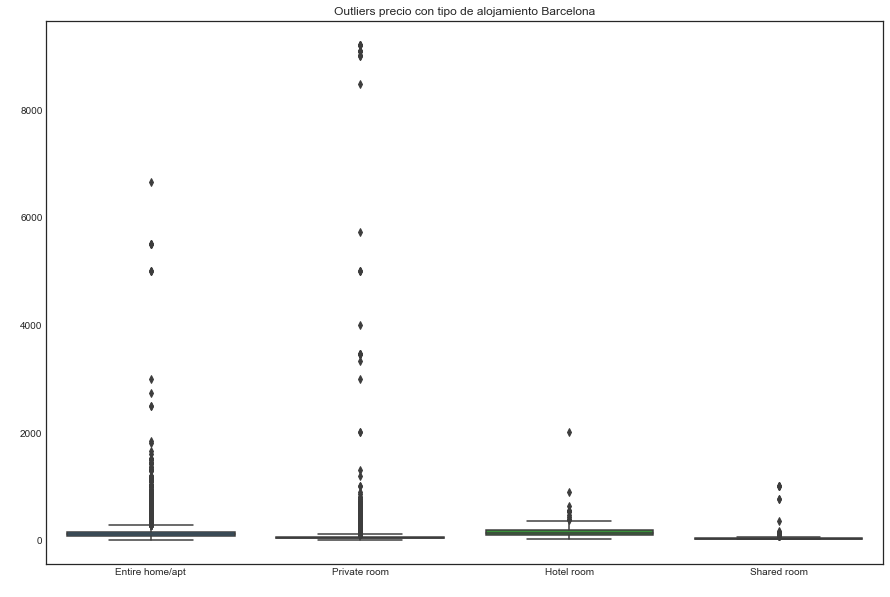

In [ ]:
# outliers precio por tipo de alojamiento
plt.figure(figsize=(15,10))
sns.boxplot(data=airbnb_bcn, x='room_type', y='price')
plt.title('Outliers precio con tipo de alojamiento Barcelona')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()
#plt.savefig('./img/outlier_precio_room_type.png') 

## Mapas

In [ ]:
# preparo dataframe para hacer el mapa por barrios
lat = pd.pivot_table(airbnb_bcn, index= 'neighbourhood', values='latitude').reset_index()
print(lat)
lon = pd.pivot_table(airbnb_bcn, index= 'neighbourhood', values='longitude').reset_index()
print(lon)
mapa_barrios = pd.merge(lat, lon)

                    neighbourhood   latitude
0                   Baró de Viver  41.448620
1                        Can Baró  41.415651
2                     Can Peguera  41.435170
3                       Canyelles  41.441620
4                Ciutat Meridiana  41.461856
..                            ...        ...
68  la Vila Olímpica del Poblenou  41.390746
69              la Vila de Gràcia  41.401757
70                      les Corts  41.385648
71                   les Roquetes  41.446797
72                les Tres Torres  41.395584

[73 rows x 2 columns]
                    neighbourhood  longitude
0                   Baró de Viver   2.205490
1                        Can Baró   2.161631
2                     Can Peguera   2.168380
3                       Canyelles   2.165470
4                Ciutat Meridiana   2.174686
..                            ...        ...
68  la Vila Olímpica del Poblenou   2.195714
69              la Vila de Gràcia   2.157392
70                      les Cort

In [ ]:
# preparo dataframe para hacer el mapa por distritos
lat = pd.pivot_table(airbnb_bcn, index= 'neighbourhood_group', values='latitude').reset_index()
lon = pd.pivot_table(airbnb_bcn, index= 'neighbourhood_group', values='longitude').reset_index()
mapa_distritos = pd.merge(lat, lon)
print(mapa_distritos)

   neighbourhood_group   latitude  longitude
0         Ciutat Vella  41.382246   2.176137
1             Eixample  41.392013   2.165661
2               Gràcia  41.404017   2.158049
3       Horta-Guinardó  41.418540   2.165360
4            Les Corts  41.380575   2.123769
5           Nou Barris  41.437439   2.175330
6          Sant Andreu  41.428167   2.190031
7           Sant Martí  41.405196   2.198164
8       Sants-Montjuïc  41.372872   2.146945
9  Sarrià-Sant Gervasi  41.401733   2.140814


In [ ]:
#mapa barcelona localizacion
map_geojson = folium.Map(location=[41.40566, 2.17015], zoom_start=12, width="%100",height="%100") 
mapa = folium.GeoJson("./barcelona/neighbourhoods.geojson", name= "geojson airbnb").add_to(map_geojson)
folium.LayerControl().add_to(map_geojson)
#mapa.save("./img/Mapa_geojson_bcn_general_bcn.htlm")
map_geojson

In [ ]:
# visualizo todo el mapa de barcelona con los distritos marcados 
map_geojson = folium.Map(location=[41.40566, 2.17015], zoom_start=12)
mapa = folium.GeoJson("./barcelona/neighbourhoods.geojson", name= "geojson airbnb").add_to(map_geojson)
folium.LayerControl().add_to(map_geojson)

for (index, row) in mapa_distritos.iterrows(): 
    folium.Marker(location = [row.loc["latitude"], row.loc["longitude"]],
    popup = row.loc["neighbourhood_group"],
    tooltip = "click").add_to(map_geojson)

# mapa.save("./img/Mapa_geojson_bcn_con_distritos.htlm")
map_geojson

In [ ]:
# VIsualización por distritos
mapa_distritos
map_dist = folium.Map(location=[41.40566, 2.17015], zoom_start=12, width="%100",height="%100")

for (index, row) in mapa_distritos.iterrows(): 
    folium.Marker(location = [row.loc["latitude"], row.loc["longitude"]],
    popup = row.loc["neighbourhood_group"],
    tooltip = "click").add_to(map_dist)  
mapa.save("./barcelona/img/mapas/Mapa_geojson_bcn_distritos_tierra.htlm")   
map_dist

In [ ]:
# mapa con todos los barrios
map_barrios = folium.Map(location=[41.40566, 2.17015], zoom_start=12, width="%100",height="%100")

for (index, row) in mapa_barrios.iterrows(): 
    folium.Marker(location = [row.loc["latitude"], row.loc["longitude"]],
    popup = row.loc["neighbourhood"],
    tooltip = "click").add_to(map_barrios)

mapa.save("./barcelona/img/mapas/mapa_barrios_bcn.htlm")   
map_barrios